In [35]:
import sympy as sm
sm.init_printing()
%matplotlib notebook

In [85]:
x = sm.symbols('x')

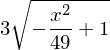

In [86]:
w = 3 * sm.sqrt(1 - (x / 7)**2)
w

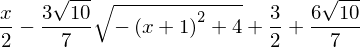

In [87]:
l = (x + 3) / 2 - sm.S(3) / 7 * sm.sqrt(10) * sm.sqrt(4 - (x + 1)**2) + sm.S(6) / 7 * sm.sqrt(10)
l

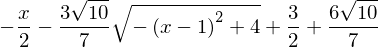

In [88]:
r = (3 - x) / 2 - sm.S(3) / 7 * sm.sqrt(10) * sm.sqrt(4 - (x - 1)**2) + sm.S(6) / 7 * sm.sqrt(10)
r

In [89]:
h_ = sm.symbols('h_')

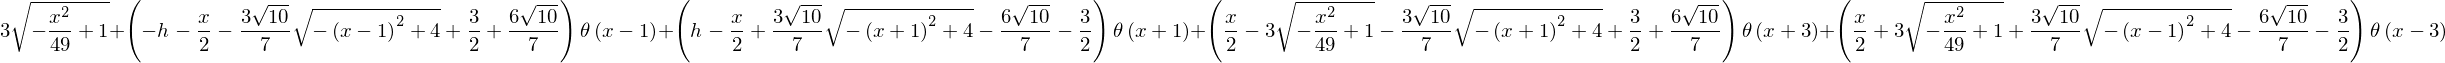

In [90]:
f = ((h_ - l) * sm.Heaviside(x + 1, 0) +
     (r - h_) * sm.Heaviside(x - 1, 0) +
     (l - w) * sm.Heaviside(x + 3, 0) +
     (w - r) * sm.Heaviside(x - 3, 0) +
     w)
f

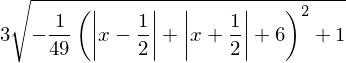

In [91]:
f_of = f.xreplace({x: sm.Abs(x + sm.S(1) / 2) + sm.Abs(x - sm.S(1) / 2) + 6})
f_of

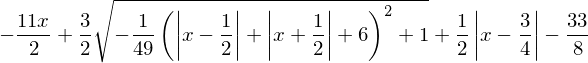

In [92]:
h = sm.S(1) / 2 * (f_of - 11 * (x + sm.S(3) / 4) + sm.Abs(x - sm.S(3) / 4))
h

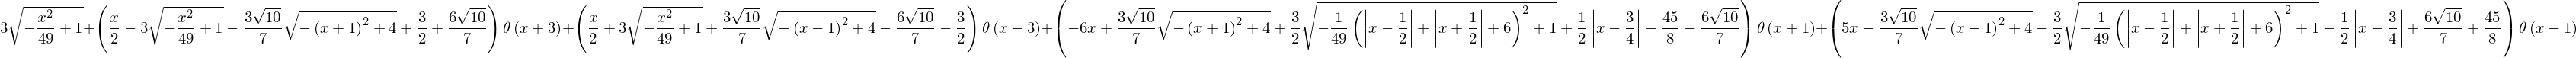

In [93]:
f = f.xreplace({h_: h})
f

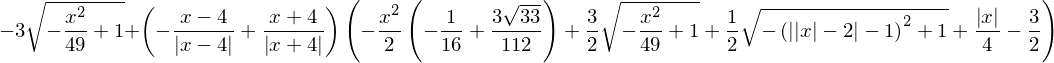

In [94]:
g = sm.S(1) / 2 * (sm.Abs(x / 2) + sm.sqrt(1 - (sm.Abs(sm.Abs(x) - 2) - 1)**2) - sm.S(1) / 112 * (3 * sm.sqrt(33) - 7) * x**2 + 3 * sm.sqrt(1 - (sm.S(1) / 7 * x)**2) - 3) * ((x + 4) / sm.Abs(x + 4) - (x - 4) / sm.Abs(x - 4)) - 3 * sm.sqrt(1 - (x / 7)**2)
g

<IPython.core.display.Javascript object>


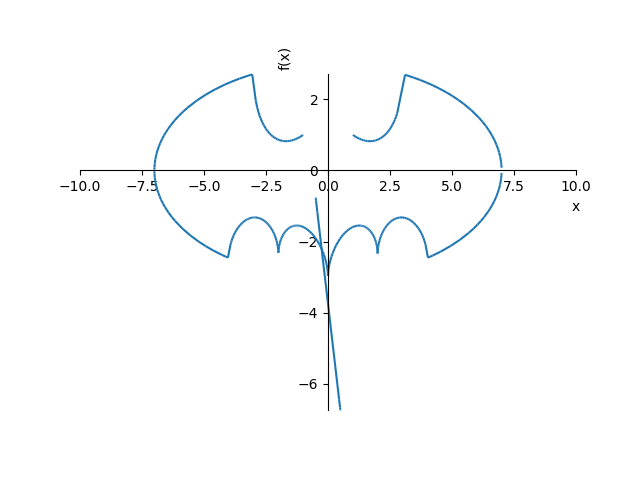

In [95]:
# TODO : There is an error somewhere here in the f function that plots the bat's ears.
sm.plot(f, g);

<IPython.core.display.Javascript object>


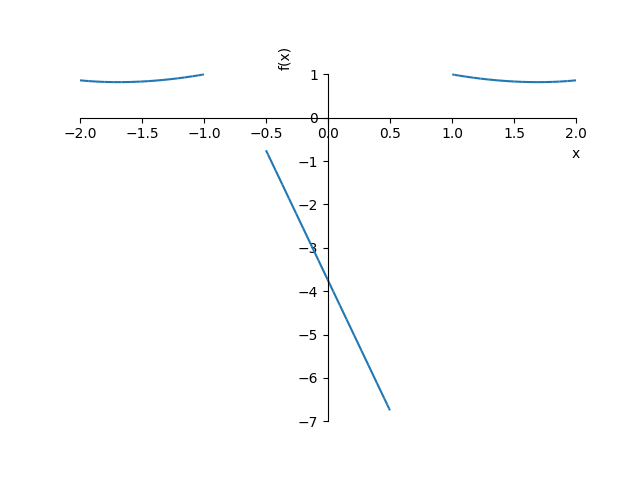

In [140]:
sm.plot(f, (x, -2, 2));

In [129]:
# try different form that seems to have numerical accuracy issues
# From: https://gist.github.com/traeblain/1487795
x, y = sm.symbols('x, y')
eq1 = ((x/7)**2*sm.sqrt(sm.Abs(sm.Abs(x)-3)/(sm.Abs(x)-3))+(y/3)**2*sm.sqrt(sm.Abs(y+3/7*sm.sqrt(33))/(y+3/7*sm.sqrt(33)))-1)
eq2 = (sm.Abs(x/2)-((3*sm.sqrt(33)-7)/112)*x**2-3+sm.sqrt(1-(sm.Abs(sm.Abs(x)-2)-1)**2)-y)
eq3 = (9*sm.sqrt(sm.Abs((sm.Abs(x)-1)*(sm.Abs(x)-.75))/((1-sm.Abs(x))*(sm.Abs(x)-.75)))-8*sm.Abs(x)-y)
eq4 = (3*sm.Abs(x)+.75*sm.sqrt(sm.Abs((sm.Abs(x)-.75)*(sm.Abs(x)-.5))/((.75-sm.Abs(x))*(sm.Abs(x)-.5)))-y)
eq5 = (2.25*sm.sqrt(sm.Abs((x-.5)*(x+.5))/((.5-x)*(.5+x)))-y)
eq6 = (6*sm.sqrt(10)/7+(1.5-.5*sm.Abs(x))*sm.sqrt(sm.Abs(sm.Abs(x)-1)/(sm.Abs(x)-1))-(6*sm.sqrt(10)/14)*sm.sqrt(4-(sm.Abs(x)-1)**2)-y)

<IPython.core.display.Javascript object>


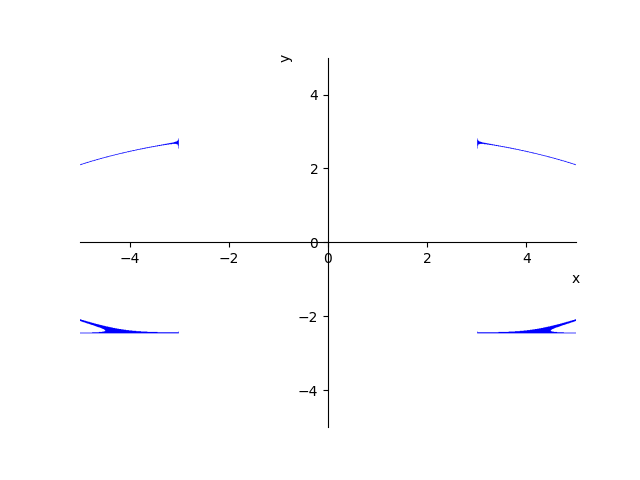

In [139]:
sm.plot_implicit(eq1, x, y);

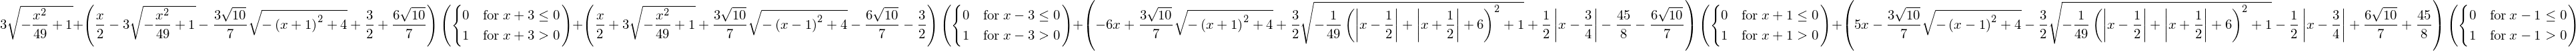

In [96]:
f.rewrite(sm.Piecewise)

In [97]:
eval_f = sm.lambdify(x, f.rewrite(sm.Piecewise))
eval_g = sm.lambdify(x, g.rewrite(sm.Piecewise))

In [98]:
import matplotlib.pyplot as plt
import numpy as np

<IPython.core.display.Javascript object>


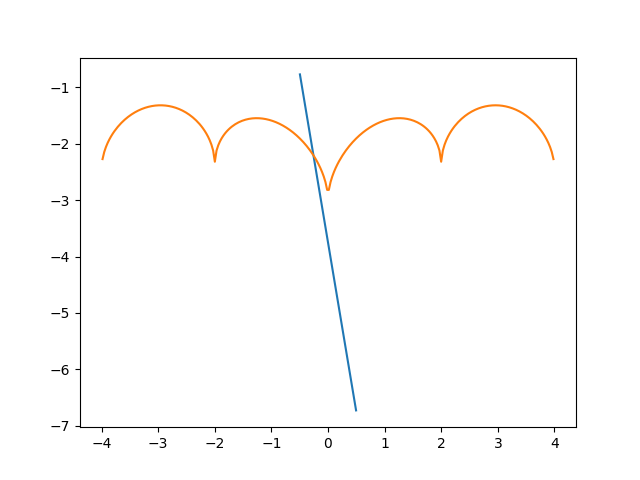

/home/moorepants/miniconda3/envs/codegen17/lib/python3.6/site-packages/numpy/__init__.py:1: RuntimeWarning: invalid value encountered in sqrt
  """
/home/moorepants/miniconda3/envs/codegen17/lib/python3.6/site-packages/numpy/__init__.py:1: RuntimeWarning: invalid value encountered in sqrt
  """


In [127]:
x_vals = np.linspace(-7.5, 7.5, 500)
plt.figure()
plt.plot(x_vals, eval_f(x_vals), x_vals, eval_g(x_vals));

In [100]:
from sympy.printing.jscode import JavascriptCodePrinter

In [101]:
class JSPrinter(JavascriptCodePrinter):
    def _print_Heaviside(self, expr):
        # NOTE : expr.rewrite(sm.Piecewise) almost does the right thing.
        P = sm.Piecewise((0, expr.args[0] < 0), (1, expr.args[0] >= 0), (sm.S(1) / 2, True))
        return self._print(P)

In [102]:
jsprinter = JSPrinter()

In [103]:
from textwrap import wrap

In [104]:
print('\n'.join(wrap(jsprinter.doprint(f).replace('\n', ' '))))

3*Math.sqrt(-1/49*Math.pow(x, 2) + 1) + ((1/2)*x -
3*Math.sqrt(-1/49*Math.pow(x, 2) + 1) -
3/7*Math.sqrt(10)*Math.sqrt(-Math.pow(x + 1, 2) + 4) + 3/2 +
(6/7)*Math.sqrt(10))*((x + 3 < 0) ? (    0 ) : ((x + 3 >= 0) ? (    1
) : (    1/2 ))) + ((1/2)*x + 3*Math.sqrt(-1/49*Math.pow(x, 2) + 1) +
(3/7)*Math.sqrt(10)*Math.sqrt(-Math.pow(x - 1, 2) + 4) -
6/7*Math.sqrt(10) - 3/2)*((x - 3 < 0) ? (    0 ) : ((x - 3 >= 0) ? (
1 ) : (    1/2 ))) + (-6*x + (3/7)*Math.sqrt(10)*Math.sqrt(-Math.pow(x
+ 1, 2) + 4) + (3/2)*Math.sqrt(-1/49*Math.pow(Math.abs(x - 1/2) +
Math.abs(x + 1/2) + 6, 2) + 1) + (1/2)*Math.abs(x - 3/4) - 45/8 -
6/7*Math.sqrt(10))*((x + 1 < 0) ? (    0 ) : ((x + 1 >= 0) ? (    1 )
: (    1/2 ))) + (5*x - 3/7*Math.sqrt(10)*Math.sqrt(-Math.pow(x - 1,
2) + 4) - 3/2*Math.sqrt(-1/49*Math.pow(Math.abs(x - 1/2) + Math.abs(x
+ 1/2) + 6, 2) + 1) - 1/2*Math.abs(x - 3/4) + (6/7)*Math.sqrt(10) +
45/8)*((x - 1 < 0) ? (    0 ) : ((x - 1 >= 0) ? (    1 ) : (    1/2
)))


In [105]:
print('\n'.join(wrap(jsprinter.doprint(g))))

-3*Math.sqrt(-1/49*Math.pow(x, 2) + 1) + (-(x - 4)/Math.abs(x - 4) +
(x + 4)/Math.abs(x + 4))*(-1/2*Math.pow(x, 2)*(-1/16 +
(3/112)*Math.sqrt(33)) + (3/2)*Math.sqrt(-1/49*Math.pow(x, 2) + 1) +
(1/2)*Math.sqrt(-Math.pow(Math.abs(Math.abs(x) - 2) - 1, 2) + 1) +
(1/4)*Math.abs(x) - 3/2)


In [106]:
from IPython.display import Javascript

In [107]:
%%javascript
require.config({
  paths: {
      'chartjs': '//cdnjs.cloudflare.com/ajax/libs/Chart.js/2.6.0/Chart'
  }
});

<IPython.core.display.Javascript object>

In [108]:
js_template = """\

require(['chartjs'], function(chartjs){{

function f(x) {{
    return {top_function}
}};

function g(x) {{
    return {bottom_function}
}};

function linspace(a,b,n) {{
    // From: https://gist.github.com/joates/6584908
    if(typeof n === "undefined") n = Math.max(Math.round(b-a)+1,1);
    if(n<2) {{ return n===1?[a]:[]; }}
    var i,ret = Array(n);
    n--;
    for(i=n;i>=0;i--) {{ ret[i] = (i*b+(n-i)*a)/n; }}
    return ret;
}}

var ctx = document.getElementById("{chart_id}");
var data = {{
    labels: linspace(-7.5, 7.5, 500),
    datasets: [{{
        label: "top",
        function: f,
        borderColor: "rgba(75, 192, 192, 1)",
        data: [],
        fill: false,
        lineTension: 0,
    }},
    {{
        label: "bottom",
        function: g,
        borderColor: "rgba(153, 102, 255, 1)",
        data: [],
        fill: false,
        lineTension: 0,
    }}]
}};

chartjs.Chart.pluginService.register({{
    beforeInit: function(chart) {{
        var data = chart.config.data;
        for (var i = 0; i < data.datasets.length; i++) {{
            for (var j = 0; j < data.labels.length; j++) {{
                var fct = data.datasets[i].function,
                    x = data.labels[j],
                    y = fct(x);
                data.datasets[i].data.push(y);
            }}
        }}
    }}
}});

var myBarChart = new chartjs.Chart(ctx, {{
    type: 'line',
    data: data,
    options: {{
        scales: {{
            yAxes: [{{
                ticks: {{
                    beginAtZero:true
                }}
            }}]
        }}
    }}
}});
    
}});

element.append("<canvas id='{chart_id}'></canvas>");\
"""

In [109]:
Javascript(js_template.format(top_function=jsprinter.doprint(f),
                              bottom_function=jsprinter.doprint(g),
                              chart_id='batman'))

<IPython.core.display.Javascript object>

In [110]:
f1 = sm.Heaviside(x - 1) + 2 * sm.Heaviside(x + 3)
g1 = 2 * sm.Heaviside(x + 3)

In [111]:
print(jsprinter.doprint(f1))

((x - 1 < 0) ? (
   0
)
: ((x - 1 >= 0) ? (
   1
)
: (
   1/2
))) + 2*((x + 3 < 0) ? (
   0
)
: ((x + 3 >= 0) ? (
   1
)
: (
   1/2
)))


In [112]:
Javascript(js_template.format(top_function=jsprinter.doprint(f1),
                              bottom_function=jsprinter.doprint(g1),
                              chart_id='heave'))

<IPython.core.display.Javascript object>